In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
us_covid = pd.read_csv('../johnshopkins/covid-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
us_mobility = pd.read_csv('data/2020_US_Region_Mobility_Report.csv')

In [52]:
maricopa_covid = us_covid.loc[(us_covid['Admin2'] == 'Maricopa')]
maricopa_mobility = us_mobility.loc[us_mobility['sub_region_2'] == 'Maricopa County']
maricopa_covid = maricopa_covid.T.reset_index()
maricopa_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
21909,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-02-15,2.0,0.0,11.0,1.0,-1.0,0.0
21910,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-02-16,5.0,1.0,23.0,1.0,0.0,-1.0
21911,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-02-17,9.0,0.0,38.0,-2.0,-28.0,5.0
21912,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-02-18,1.0,1.0,11.0,8.0,1.0,0.0
21913,US,United States,Arizona,Maricopa County,NaN,NaN,4013.0,2020-02-19,4.0,0.0,11.0,7.0,1.0,0.0


1/23/20


Text(0.5, 1.0, 'Confirmed Cases Time Series')

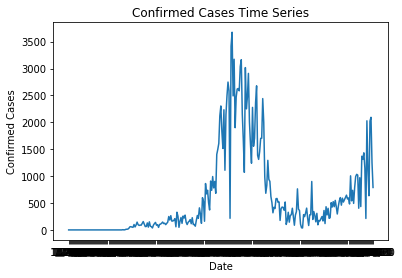

In [44]:
plot_date = maricopa_covid.loc[11:]
date = maricopa_covid['index'].loc[12:].tolist()
cases = plot_date[108].tolist()

daily = []
for i in range(len(cases)-1):
    change = 0
    change = cases[i+1] - cases[i]
    daily.append(change)
    i += 1
    
plt.plot(date, daily)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases Time Series")

Text(0.5, 1.0, 'Confirmed Cases Time Series')

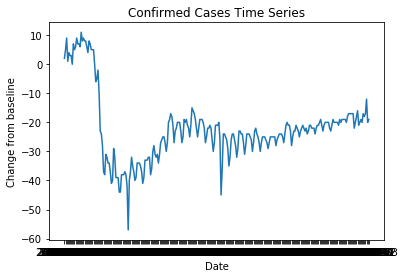

In [57]:
date = maricopa_mobility['date']
retail = maricopa_mobility['retail_and_recreation_percent_change_from_baseline']

plt.plot(date, retail)
plt.xlabel("Date")
plt.ylabel("Change from baseline")
plt.title("Confirmed Cases Time Series")